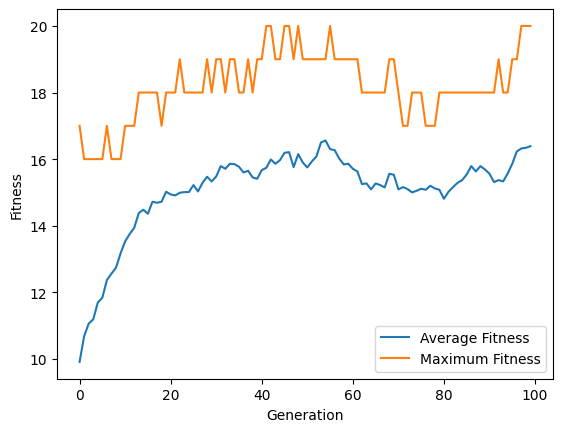

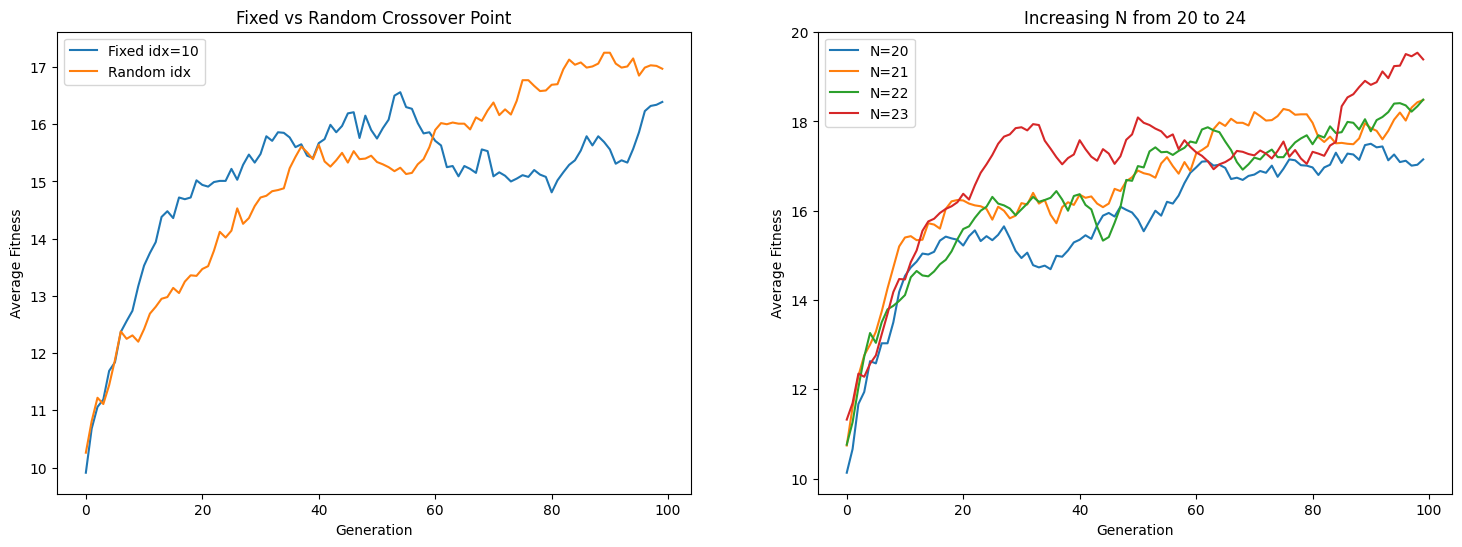

In [2]:
import random
import matplotlib as plt
random.seed(123456)

population_size = 100
generations = 100
mutation_rate = 0.01
crossover_rate = 0.25
fixed_idx = 10  

def mutate(individual, mutation_rate):
    return [bit if random.random() > mutation_rate else 1 - bit for bit in individual]

def crossover(parent1, parent2, crossover_rate, fixed_idx=None):
    if random.random() < crossover_rate:
        idx = fixed_idx if fixed_idx is not None else random.randint(1, len(parent1) - 1)
        return parent1[:idx] + parent2[idx:], parent2[:idx] + parent1[idx:]
    else:
        return parent1, parent2

def select(population, fitnesses):
    total_fitness = sum(fitnesses)
    selection_probs = [fitness / total_fitness for fitness in fitnesses]
    return population[random_selection(selection_probs)]

def random_selection(probs):
    random_value = random.random()
    for i, prob in enumerate(probs):
        random_value -= prob
        if random_value <= 0:
            return i

def generate_population(size, N):
    return [[random.randint(0, 1) for _ in range(N)] for _ in range(size)]


def fitness(individual):
    return sum(individual)


def genetic_algorithm(N, population_size, generations, mutation_rate, crossover_rate, fixed_idx=None):
    population = generate_population(population_size, N)
    history = []

    for generation in range(generations):
        fitnesses = [fitness(individual) for individual in population]
        new_population = []

        for _ in range(population_size // 2):
            parent1 = select(population, fitnesses)
            parent2 = select(population, fitnesses)
            child1, child2 = crossover(parent1, parent2, crossover_rate, fixed_idx)
            new_population.append(mutate(child1, mutation_rate))
            new_population.append(mutate(child2, mutation_rate))

        population = new_population
        history.append((sum(fitnesses) / population_size, max(fitnesses)))

    return population, history


# Fixed crossover point
N = 20
_, history_fixed = genetic_algorithm(N, population_size, generations, mutation_rate, crossover_rate, fixed_idx)


# Plot the results
import matplotlib.pyplot as plt
plt.plot([avg for avg, _ in history_fixed], label='Average Fitness')
plt.plot([max_ for _, max_ in history_fixed], label='Maximum Fitness')
plt.xlabel('Generation')
plt.ylabel('Fitness')
plt.legend()
# plt.show()
plt.savefig("ga_avgVSmax.pdf")
plt.show()


# Increasing N from 20 to 24
histories = []
for N in range(20, 24):
    _, history = genetic_algorithm(N, population_size, generations, mutation_rate, crossover_rate)
    histories.append((N, history))

plt.figure(figsize=(18, 6))

# Fixed crossover point vs Random crossover point
plt.subplot(1, 2, 1)
plt.plot([avg for avg, _ in history_fixed], label='Fixed idx={}'.format(fixed_idx))
N=20
_, history_random = genetic_algorithm(N, population_size, generations, mutation_rate, crossover_rate)
plt.plot([avg for avg, _ in history_random], label='Random idx')
plt.xlabel('Generation')
plt.ylabel('Average Fitness')
plt.title('Fixed vs Random Crossover Point')
plt.legend()

# Increasing N from 20 to 24 (Average Fitness)
plt.subplot(1, 2, 2)
for N, history in histories:
    plt.plot([avg for avg, _ in history], label='N={}'.format(N))
plt.xlabel('Generation')
plt.ylabel('Average Fitness')
plt.title('Increasing N from 20 to 24')
plt.legend()
plt.savefig("ga_fixVsran_Nchange.pdf")
plt.show()


